# Part 1 

In [1]:
## 1. Import the necessary libraries (Importieren Sie die notwendigen Bibliotheken )

In [2]:
### Disable the Python warnings
### Deaktivieren Sie die Python-Warnungen
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, make_scorer
)
from sklearn.metrics import roc_curve, auc

In [4]:
### 2.Print first 5 row of the dataset (Geben Sie die ersten 10 Zeilen des Datensatzes aus.)
df=pd.read_csv('clean_titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,fare_category,embarked_0,...,who_1,who_2,deck_0,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7
0,0,2,1,22,1,0,7,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,38,1,0,71,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,2,0,26,0,0,7,1,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,35,1,0,53,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,2,1,35,0,0,8,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [5]:
### 3. The 'Survived' column is the target column.
### Die Spalte 'Survived' ist die Zielvariable.

## KNN model training 

In [6]:
### 1. Split the data into four pieces: train_x, test_x, train_y, and test_y . (The target value is the 'Survived')
## Teilen Sie die Daten in vier Teile auf: train_x, test_x, train_y und test_y. ('Der Zielwert ist die 'Survived')

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('survived', axis=1)
y = df[["survived"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [8]:
### 2 Activate the code below and analyze the values of the 'Survived' column
### Aktivieren Sie den untenstehenden Code und analysieren Sie die Werte der Spalte 'Survived'


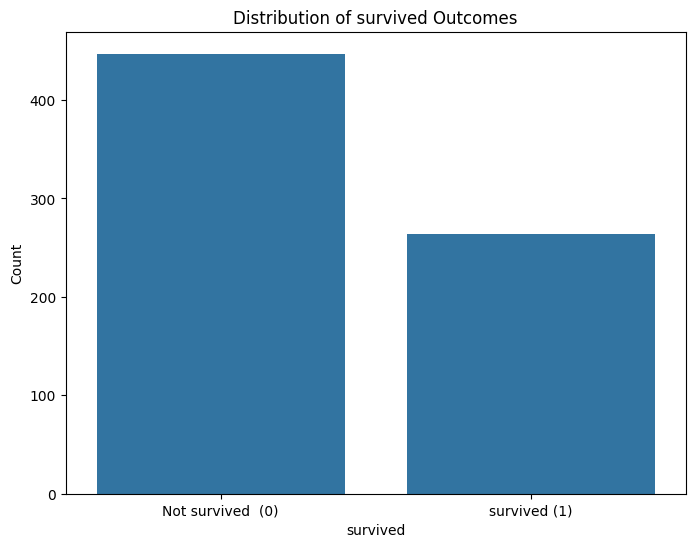

In [9]:
outcome_counts = y_train['survived'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title('Distribution of survived Outcomes')
plt.xlabel('survived')
plt.ylabel('Count')
plt.xticks([0, 1], [ 'Not survived  (0)', 'survived (1)'])
plt.show()

In [10]:
### 3. Use the SMOTE library to balance the 'Survived' column
### Verwenden Sie die SMOTE-Bibliothek, um die Spalte 'Survived' auszugleichen.
from imblearn.over_sampling import SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
### Getting the Optimal Number of Clusters

### 4. Use the GridSearchCV method to find the best parameters and train the model use (range(1, 32) , cv 5 )
### Verwenden Sie die Methode GridSearchCV, um die besten Parameter zu finden und das Modell zu trainieren . Benutzt (range(1, 32) , cv 5  )

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
# Hyperparameter Tuning
param_grid = {'n_neighbors': range(1, 32),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Cross-Validation
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [14]:
scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
mean_score = scores.mean()
print(f'This is the scores {scores} and the mean score is {mean_score}')

This is the scores [0.78212291 0.75418994 0.90502793 0.8603352  0.82022472] and the mean score is 0.8243801393509511


In [15]:
### 4. Look at the best K value visually.
### Betrachten Sie den besten K-Wert visuell.

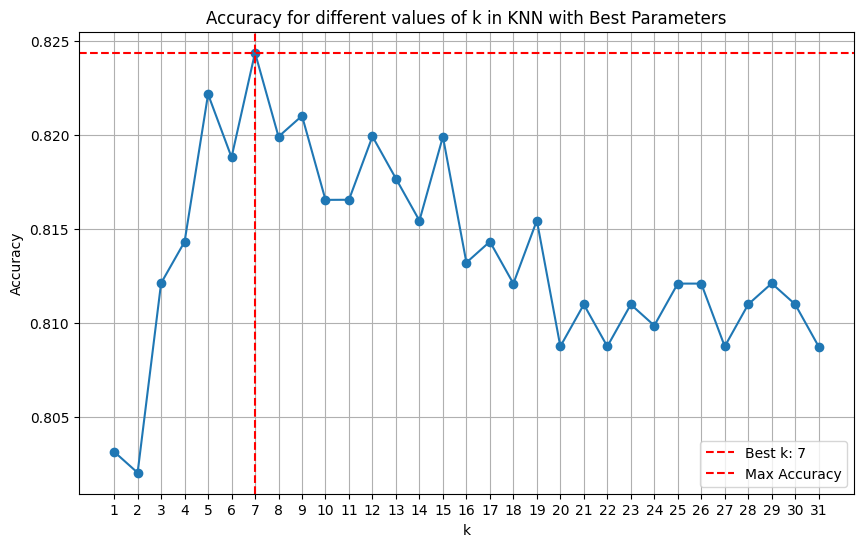

In [24]:
best_params = grid_search.best_params_
k_values = range(1, 32)
average_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=best_params['weights'], metric=best_params['metric'])
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    average_accuracies.append(np.mean(scores))
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of k in KNN with Best Parameters')
plt.grid(True)
best_k = k_values[np.argmax(average_accuracies)]
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k: {best_k}')
plt.axhline(max(average_accuracies), color='red', linestyle='--', label='Max Accuracy')
plt.legend()
plt.show()

In [ ]:
### Cross validation
### Use the cross-validation method to analyze the machine learning model's score on the training dataset.
###  Verwenden Sie die Kreuzvalidierungsmethode, um die Punktzahl des maschinellen Lernmodells auf dem Trainingsdatensatz zu analysieren

In [20]:
train_scores = {
    'accuracy': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'precision': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='precision').mean(),
    'recall': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='recall').mean(),
    'f1': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='f1').mean(),
    'roc_auc': cross_val_score(best_knn, X_train, y_train, cv=5, scoring='roc_auc').mean()
}
# print("Training Set Evaluation Metrics:")
for metric, score in train_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")

Accuracy: 0.8244
Precision: 0.8103
Recall: 0.8506
F1: 0.8276
Roc_auc: 0.8816


In [17]:
### 5.  Check the model's score on the test dataset
### Überprüfen Sie die Punktzahl des Modells auf dem Testdatensatz

In [22]:
y_pred = best_knn.predict(X_test)
test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
}
print("\nTest Set Evaluation Metrics:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.7416
Precision: 0.6630
Recall: 0.8026
F1: 0.7262
Roc_auc: 0.7778


In [ ]:
### Examine the confusion matrix and analyze where the model makes more mistakes
###  Betrachten Sie die Verwechslungsmatrix und analysieren Sie, wo das Modell mehr Fehler macht

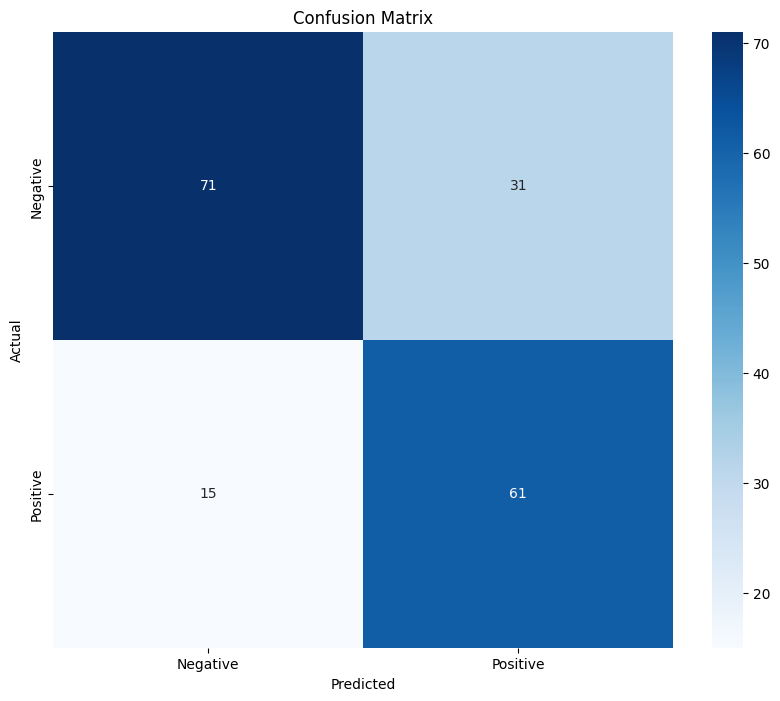

In [23]:
# Compute confusion matrix
cm_pred = confusion_matrix(y_test, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pred, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show() 

In [ ]:
### Use the permutation_importance function to analyze which information is important for making predictions.
###  Verwenden Sie die Funktion zur permutation_importance, um zu analysieren, welche Informationen für die Vorhersage wichtig sind.

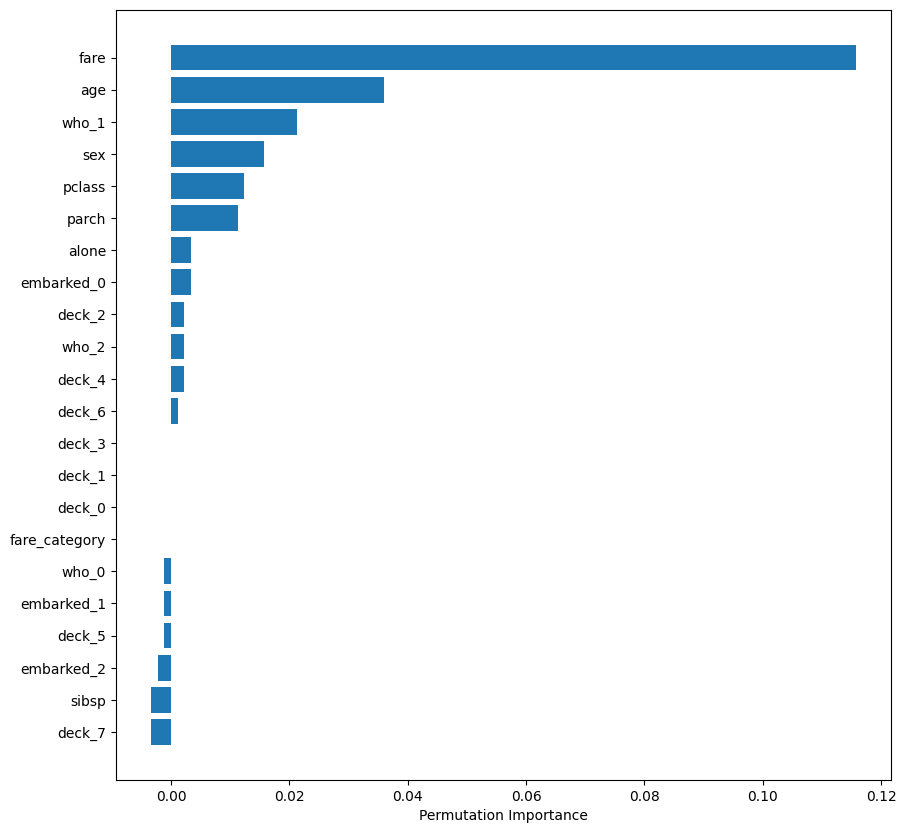

In [26]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_knn, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
### Compare the result of KNN with Logistic Regression, and determine which one shows better performance for prediction.
### Vergleichen Sie das Ergebnis von KNN mit der Logistischen Regression und bestimmen Sie, welches eine bessere Leistung für die Vorhersage zeigt.
